pytesseract for basic OCR

OpenCV for image preprocessing

EasyOCR for deep learning-based OCR

pdf2image for PDFs

re for extracting structured data (like invoice numbers)

In [1]:
pip install pytesseract opencv-python pillow easyocr pdf2image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

Set path in code (Windows only):

In [ ]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

## **PIL stands for Python Imaging Library.**

It is a Python library for opening, manipulating, and saving many different image file formats such as PNG, JPEG, TIFF, BMP, and GIF.

Supported Image Formats for Image.open() (and OCR):
.png

.jpg / .jpeg

.bmp

.tiff / .tif

.gif (not ideal for OCR, unless it's a static frame)

These formats are supported by Pillow (PIL) and can be read as image objects.

Best Practices for OCR-Ready Images
Criteria	Recommendation
📏 Image Size	Medium resolution (e.g., 300 DPI). Avoid very small text.
🌈 Color	Grayscale or black & white is better. Colored backgrounds reduce accuracy.
🔤 Text Type	Printed, machine-typed text is best (e.g., from PDFs, scanned docs)
✍️ Handwritten Text	Use EasyOCR or specialized models (Tesseract isn’t great at cursive text)
📐 Orientation	Text should be horizontal and upright (not tilted or rotated)
🧹 Clean Background	No lines, borders, or noisy elements
💡 Contrast	High contrast between text and background

 Avoid These for Better Accuracy
Blurry or low-resolution images

Text overlapping with complex backgrounds (e.g., watermarks, shadows)

Images with skewed or rotated text

Very small font sizes or noisy scanned documents

Example Images You Can Pass

scanned_receipt.png

typed_letter.jpg

invoice_page1.tiff

clear_screenshot_text.bmp

# **Example 1: Basic OCR from Image (using pytesseract)**

In [2]:
from PIL import Image
import pytesseract

# Load image with printed text
image = Image.open('Sample_image.png')  # Replace with your file path

# Extract text using Tesseract
text = pytesseract.image_to_string(image)

print("Extracted Text:\n", text)


Extracted Text:
 Vear Santa.
I have been very aood this
ear And have been thinkin
of what L would like for
Christmas.
\. leao
L. \oicycle
%. RURRY
Lam very excited for your
VISIt And will leave out Some
Snacks fov YoU And your
reindeer.

love.



Explanation:
Image.open() loads the image.

image_to_string() does all: preprocess → detect → recognize text.

Output is a plain string.

# **Example 2: Image Preprocessing with OpenCV (for noisy images)**

In [3]:
import cv2
import pytesseract

# Load image
img = cv2.imread("noisy_2.jpg")

# Convert to grayscale (removes color, keeps intensity)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold to create binary image (black & white)
_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

# OCR from the processed image
text = pytesseract.image_to_string(thresh)

print("OCR Output:\n", text)

OCR Output:
  

 

‘There erist several metj Mesign forms with fields to
Jiclds may be surreugded BP Mounding bores, by Light rectangles

methods specify whdfiigto write and, therefore, urinimize the effe
with other parts of Uigorm. Thése quides can be located on « s
is located betow the formh or they can be printed directiy on the I
a separate sheed is much better from the point of view of the gud
bul requires giving more jrstructions aud. mare importantly. res
this lype of gu wisitéom.is used. Guiding rulers printed on the
ight reetangles can be removed more easily
itten tert touches the nders. Nevertheless.
be tal Reount: The best way to print these light rectan,

 

   
      
 

 

 

wo m0 xe a

 



 Explanation:
Preprocessing improves accuracy for noisy images.

Thresholding helps isolate text by removing shadows or background.

# **Example 3: OCR from PDF (First Page)**

In [5]:
!apt install poppler-utils
!pip install pdf2image pytesseract pillow

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 186 kB of archives.
After this operation, 697 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.8 [186 kB]
Fetched 186 kB in 1s (302 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 126319 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.8_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.8) ...
Setting up poppler-utils (22.02.0-2ubuntu0.8) ...
Processing triggers for man-db (2.10.2-1) ...


In [10]:
from pdf2image import convert_from_path
import pytesseract
from PIL import Image
import os

# Convert PDF to images
pages = convert_from_path('List of JOB Portals.pdf', 300)

# OCR on first page
text = pytesseract.image_to_string(pages[0])

# Display extracted text
print("Extracted Text from First Page:\n")
print(text)


Extracted Text from First Page:

Top sites for carrer and

BI

1. Linkedin

2. Indeed

3. Naukri

4. Monster

5. JobBait

6. Careercloud
7. Dice

8. CareerBuilder
9. Jibberjobber
10. Glassdoor

1. Machine Learning
2. Mobile Development

 



 Explanation:
pdf2image converts PDF to image(s).

We pass the first page image to Tesseract.

# Example 4: Handwritten Text OCR using **EasyOCR**

In [11]:
import easyocr

# Create reader object (supports 80+ languages)
reader = easyocr.Reader(['en'])

# Read text from image
results = reader.readtext('Hand_written.png')

# Print all detected texts
for bbox, text, conf in results:
    print(f"Detected Text: {text} (Confidence: {conf:.2f})")


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% CompleteDetected Text: Usel, (Confidence: 0.19)
Detected Text: Ulea Aoltic (Confidence: 0.10)
Detected Text: uty - (Confidence: 0.05)
Detected Text: mackinea Hat (Confidence: 0.53)
Detected Text: Ue (Confidence: 0.82)
Detected Text: ah (Confidence: 0.98)
Detected Text: acal_p to iute you, (Confidence: 0.23)
Detected Text: Te 1eanta (Confidence: 0.12)
Detected Text: ahe (Confidence: 0.70)
Detected Text: SE52 (Confidence: 0.07)
Detected Text: hom adual (Confidence: 0.17)
Detected Text: Try * (Confidence: 0.38)
Detected Text: Te Rokt (Confidence: 0.61)
Detected Text: Deas (Confidence: 0.39)
Detected Text: vintnalls (Confidence: 0.39)
Detected Text: today! (Confidence: 0.66)


In [13]:
# Create reader object (supports 80+ languages)
reader = easyocr.Reader(['en'])

# Read text from image
results = reader.readtext('Hand_written_text.jpg')

# Print all detected texts
for bbox, text, conf in results:
    print(f"Detected Text: {text} (Confidence: {conf:.2f})")

Detected Text: HeyJoy , (Confidence: 0.83)
Detected Text: Mailkaft (s Aow (Confidence: 0.36)
Detected Text: 0 (Confidence: 1.00)
Detected Text: the option (Confidence: 0.80)
Detected Text: customized (Confidence: 1.00)
Detected Text: stu (Confidence: 0.92)
Detected Text: +o showcase (Confidence: 0.67)
Detected Text: Personalized message. Yoo can (Confidence: 0.57)
Detected Text: choose the stahonerys type, size, (Confidence: 0.59)
Detected Text: Color,and even (Confidence: 0.66)
Detected Text: include yeur own (Confidence: 0.60)
Detected Text: oC (Confidence: 0.38)
Detected Text: lettecheadi (Confidence: 0.41)
Detected Text: Order (Confidence: 1.00)
Detected Text: by Hhe end (Confidence: 0.98)
Detected Text: the month to (Confidence: 0.54)
Detected Text: receive lo % (Confidence: 0.31)
Detected Text: off your customized (Confidence: 0.80)
Detected Text: Mailliftteam (Confidence: 0.68)
Detected Text: ffen~g (Confidence: 0.36)
Detected Text: 0 f (Confidence: 0.98)
Detected Text: tionery 

Explanation:
EasyOCR uses deep learning and performs better on handwritten or irregular fonts.

Output includes bounding box, text, and confidence score.

# Example 5: Extract Invoice Number from OCR Text

In [27]:
import pytesseract
from PIL import Image
import re

# Load the image
image = Image.open('Invoice.png')

# Perform OCR
text = pytesseract.image_to_string(image)

# OPTIONAL: print full OCR text for debugging
# print(text)

# Regex to match order number: pattern like 403-6285254-5322737
order_number_match = re.search(r'Order\s*Number\s*[:\-]?\s*([0-9\-]+)', text)

# Regex to match order date: pattern like 05.12.2024 or similar
order_date_match = re.search(r'Order\s*Date\s*[:\-]?\s*([0-9./-]{8,})', text)

# Results
order_number = order_number_match.group(1) if order_number_match else "Not found"
order_date = order_date_match.group(1) if order_date_match else "Not found"

print("✅ Extracted Fields:")
print("Order Number:", order_number)
print("Order Date:", order_date)


✅ Extracted Fields:
Order Number: 403-6285254-5322737
Order Date: 05.12.2024


 Explanation:
We use re (regex) to extract specific info like invoice numbers, dates, etc.

Very useful in business document processing.

# Example 6: OCR on a Multi-language Image (e.g., English + Hindi)

In [30]:
# Make sure Tesseract is installed with required languages
# Example command (Linux): sudo apt install tesseract-ocr-hin

text = pytesseract.image_to_string(Image.open('Multilanguage.jpeg'), lang='eng+hin')
print(text)


aga gt ren ora wet gi
tS enough, Now let's go out of here.

saga gtr ora ger og |
Itenough, Now stop laughing.

saga gt re ara wa gt esafh

|S enough, Now Itl not convince her.

saga tre ara ft ward at eh
|S enough, Now Ill not study.

saga Ste ora ort ara oe
1S enough, Now stop your bullshit.

age aoe ete



In [33]:
# 1. Install Tesseract if not already present
!apt-get install -y tesseract-ocr

# 2. Install Hindi language pack for Tesseract
!apt-get install -y tesseract-ocr-hin

# 3. Install pytesseract and other dependencies
!pip install pytesseract
!pip install opencv-python pillow


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-hin
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 913 kB of archives.
After this operation, 1,138 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-hin all 1:4.00~git30-7274cfa-1.1 [913 kB]
Fetched 913 kB in 1s (1,105 kB/s)
Selecting previously unselected package tesseract-ocr-hin.
(Reading database ... 126349 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-hin_1%3a4.00~git30-7274cfa-1.1_all.deb ...
Unpacking tesseract-ocr-hin (1:4.00~git30-7274cfa-1.1) ...
Setting up tesseract-ocr-

In [35]:
import pytesseract
import cv2
from PIL import Image
import matplotlib.pyplot as plt

# Load image (make sure to upload it first)
img = cv2.imread('Multilanguage.jpeg')  # replace with your uploaded file name
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

# OCR with Hindi + English
text = pytesseract.image_to_string(thresh, lang='eng+hin')

# Output
print("Extracted Text:\n", text)


Extracted Text:
 age Ara oe ea a ला
15 enough, Now lets go out of here.

बढ़त ही गया अब हंसना बंद करो।
enough, Now stop laughing,

aga dar sia 8 38 Ef oh
45 enough, New Inet convince her

बहुल हो गया अब मैं पढ़ाई नहीं करूंगी।
Ws enough, Now ILI not study.

बहन हो गया अब अपनी बकवास बंद करो।
WS enough, How stop your bullshit.

age eb ra dort |



In [36]:
import cv2
import pytesseract
from matplotlib import pyplot as plt

# Load image
image = cv2.imread('Multilanguage.jpeg')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply median blur (removes noise)
blur = cv2.medianBlur(gray, 3)

# Adaptive thresholding (better than fixed threshold)
thresh = cv2.adaptiveThreshold(
    blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Optional: save preprocessed image for debug
cv2.imwrite("cleaned.png", thresh)

# OCR with Hindi + English
text = pytesseract.image_to_string(thresh, lang='eng+hin')
print("📝 OCR Output:\n", text)


📝 OCR Output:
  

acm wa anf ear as adi
RE estegh tow 209 joa DADE

 

spare sadaaraar |
Penman



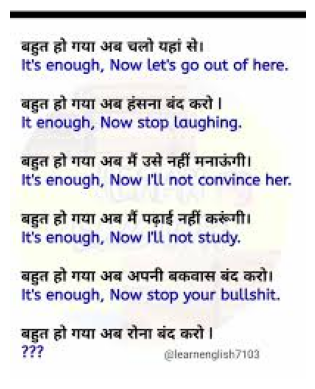

Progress: |██████████████████████████████████████████████████| 100.0% Completeबहन हो गया अय चसो यहां सेE
Its enough Now let5 go out of here
बह़न हो गया अय हंसना बंद करो
enough
Ston lauaning
बह़न हो गया
अब र्म उसै नहीं मनाऊंँगी|
Its enough Now IUL not convince her
बड़़न हो गया अब
पदाई नहों करूंगी|
It5 enough Now Ill not study
बह़न हा गया अच अपनी बकवास चंद कराl
It5 enough Now stop your bullshit
बड़न हा गया अच रौना बंद कर
iL Izuriienclisr 7१)३
mhaw


In [37]:
import easyocr
from matplotlib import pyplot as plt
import cv2

# Load and show image
img_path = '/content/Multilanguage.jpeg'
img = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Run EasyOCR
reader = easyocr.Reader(['en', 'hi'])  # English + Hindi
results = reader.readtext(img_path)

# Print all detected text
for detection in results:
    print(detection[1])
